# Football betting example from chapter 1

In [1]:
import re
import numpy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATAFILE = "../datasets/football.asc"

Let's read the data. The data is in a free form ASCII file which we need to parse. We just pick up data strings with a regular expression.

In [3]:
data = []
with open(DATAFILE, "r") as f:
    for line in f:
        line = line.strip()
        rec = re.match(r"\d+\s+(?P<favorite>\d+)\s+(?P<underdog>\d+)\s+(?P<spread>\d+\.\d+)\s+.*", line)
        if rec:
            data.append([float(rec[field]) for field in ['favorite', 'underdog', 'spread']])
data = numpy.array(data)

Let's plot the spread histogram to make sure we parsed the data correctly.

Text(0.5, 1.0, 'spread')

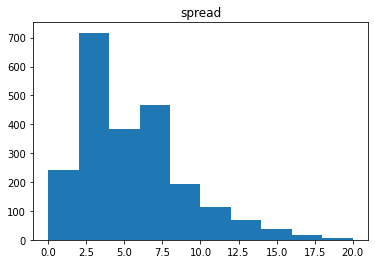

In [4]:
plt.hist(data[:,2])
plt.title('spread')

The game outcomes are presented in the scatter plot below. We want to predict a game outcome based on the spread.

Text(0, 0.5, 'outcome')

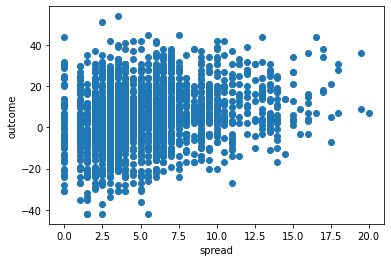

In [5]:
plt.scatter(data[:,2], data[:, 0] - data[:, 1])
plt.xlabel('spread')
plt.ylabel('outcome')

Now, let's transform the data so that instead of the row outcome we see outcome relative to the point spread.

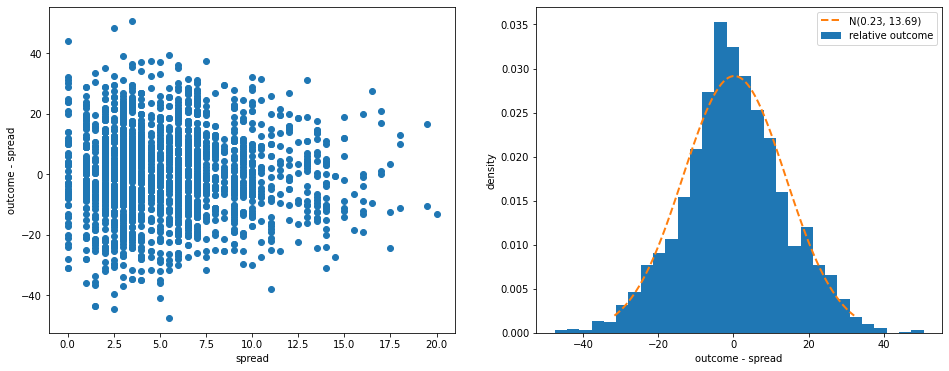

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
relout = data[:, 0] - data[:, 1] - data[:, 2]
ax[0].scatter(data[:, 2], relout)
ax[0].set_xlabel('spread')
ax[0].set_ylabel('outcome - spread')
ax[1].hist(relout, density=True, bins=30, label='relative outcome')
ax[1].set_xlabel('outcome - spread')
ax[1].set_ylabel('density')

# We can compute the parameters of the relative outcome distribution, under normal assumption.
mean = relout.mean()
std = relout.std()
x = numpy.linspace(mean + std*norm.ppf(0.01), mean + std*norm.ppf(0.99), 100)
ax[1].plot(x, norm.pdf(x, loc=mean, scale=std), '--', lw=2, label='N({:.2f}, {:.2f})'.format(mean, std))
ax[1].legend()

Knowing the parameters of our model, we can predict game outcomes given spreads:
    

In [7]:
print("{:10s}{:10s}".format("spread", "outcome"))
for spread in range(10):
    print("{:<10.2f}{:<.1f}±{:.1f}".format(spread, spread+mean, std))

spread    outcome   
0.00      0.2±13.7
1.00      1.2±13.7
2.00      2.2±13.7
3.00      3.2±13.7
4.00      4.2±13.7
5.00      5.2±13.7
6.00      6.2±13.7
7.00      7.2±13.7
8.00      8.2±13.7
9.00      9.2±13.7


We can also predict the probability that the actual outcome differs by more than x points from the spread.

In [20]:
print("{:20s}{:20s}".format("outcome - spread", "probability"))
for diff in range(-8, 8, 1):
    cdf = norm.cdf(diff, loc=mean, scale=std)
    print("{:<20.2f}{:<20.3f}".format(diff, 1 - cdf if diff > 0 else cdf))

outcome - spread    probability         
-8.00               0.274               
-7.00               0.299               
-6.00               0.325               
-5.00               0.351               
-4.00               0.379               
-3.00               0.407               
-2.00               0.435               
-1.00               0.464               
0.00                0.493               
1.00                0.477               
2.00                0.448               
3.00                0.420               
4.00                0.391               
5.00                0.364               
6.00                0.337               
7.00                0.310               


Compare that to predicting outcomes without a model.

In [29]:
print("{:10s}{:10s}{:10s}{:10s}".format("spread", "#items", "mean", "std"))
spreads = sorted(set(data[:,2]))
nitems = []
for spread in spreads:
    subset = data[data[:,2]==spread,:]
    nitems.append(len(subset))
    print("{:<10.1f}{:<10.1f}{:<10.1f}{:<10.1f}".format(spread, len(subset),
                                                        (subset[:,0]-subset[:,1]).mean(),
                                                        (subset[:,0]-subset[:,1]).std()))

spread    #items    mean      std       
0.0       59.0      1.1       16.4      
1.0       109.0     2.5       12.4      
1.5       73.0      -3.9      15.0      
2.0       143.0     2.3       13.3      
2.5       155.0     0.9       14.6      
3.0       236.0     3.0       12.5      
3.5       183.0     4.5       13.9      
4.0       144.0     4.4       14.4      
4.5       68.0      4.4       13.4      
5.0       100.0     4.5       14.5      
5.5       71.0      6.7       15.6      
6.0       141.0     6.1       13.7      
6.5       132.0     8.0       13.3      
7.0       137.0     10.1      13.2      
7.5       55.0      9.3       13.6      
8.0       49.0      8.0       10.8      
8.5       27.0      7.9       12.8      
9.0       66.0      8.2       12.7      
9.5       50.0      9.9       11.7      
10.0      53.0      10.9      12.8      
10.5      23.0      11.7      13.5      
11.0      26.0      6.3       15.4      
11.5      12.0      15.8      13.2      
12.0      17.0  

For larger spreads the number of items is tiny and would give wrong results.

Text(0, 0.5, 'number of items')

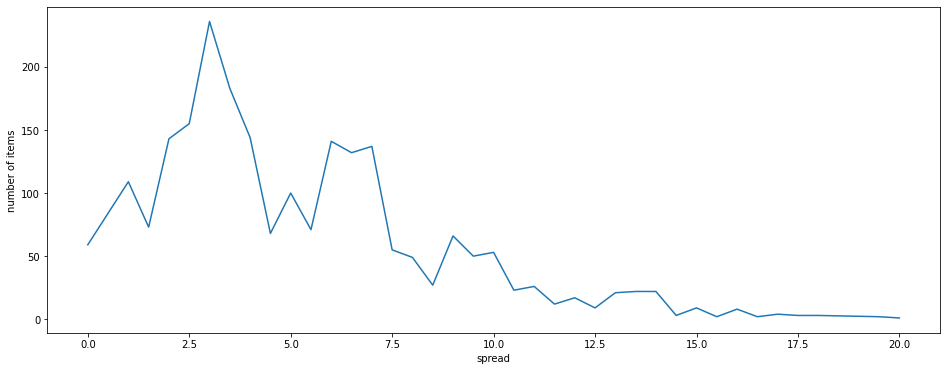

In [33]:
plt.figure(figsize=(16, 6))
plt.plot(spreads, nitems)
plt.xlabel("spread")
plt.ylabel("number of items")